In [ ]:
## https://matplotlib.org/3.5.0/gallery/color/named_colors.html
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import importlib
import Colors as mycol

In [3]:
def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

Colors:
```
px.colors.qualitative.Alphabet
mcolors.CSS4_COLORS
mcolors.XKCD_COLORS # very big
```

In [69]:
print(len(px.colors.qualitative.Alphabet))
print(len(mcolors.CSS4_COLORS))
print(len(mcolors.XKCD_COLORS))

26
148
949


In [73]:
importlib.reload(mycol)
# colors = px.colors.qualitative.Alphabet
colors = mycol.all_colors
print(len(colors))
colors_dict = {name:name for name in colors}

33


In [74]:
mcolors.CSS4_COLORS.values()

dict_values(['#F0F8FF', '#FAEBD7', '#00FFFF', '#7FFFD4', '#F0FFFF', '#F5F5DC', '#FFE4C4', '#000000', '#FFEBCD', '#0000FF', '#8A2BE2', '#A52A2A', '#DEB887', '#5F9EA0', '#7FFF00', '#D2691E', '#FF7F50', '#6495ED', '#FFF8DC', '#DC143C', '#00FFFF', '#00008B', '#008B8B', '#B8860B', '#A9A9A9', '#006400', '#A9A9A9', '#BDB76B', '#8B008B', '#556B2F', '#FF8C00', '#9932CC', '#8B0000', '#E9967A', '#8FBC8F', '#483D8B', '#2F4F4F', '#2F4F4F', '#00CED1', '#9400D3', '#FF1493', '#00BFFF', '#696969', '#696969', '#1E90FF', '#B22222', '#FFFAF0', '#228B22', '#FF00FF', '#DCDCDC', '#F8F8FF', '#FFD700', '#DAA520', '#808080', '#008000', '#ADFF2F', '#808080', '#F0FFF0', '#FF69B4', '#CD5C5C', '#4B0082', '#FFFFF0', '#F0E68C', '#E6E6FA', '#FFF0F5', '#7CFC00', '#FFFACD', '#ADD8E6', '#F08080', '#E0FFFF', '#FAFAD2', '#D3D3D3', '#90EE90', '#D3D3D3', '#FFB6C1', '#FFA07A', '#20B2AA', '#87CEFA', '#778899', '#778899', '#B0C4DE', '#FFFFE0', '#00FF00', '#32CD32', '#FAF0E6', '#FF00FF', '#800000', '#66CDAA', '#0000CD', '#BA55D3

In [75]:
#css color dict
css_col_dict = {name:name for name in mcolors.CSS4_COLORS.values()}

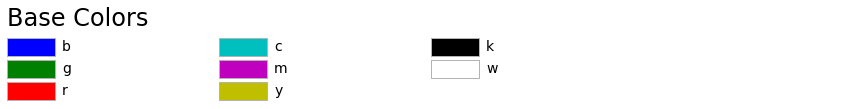

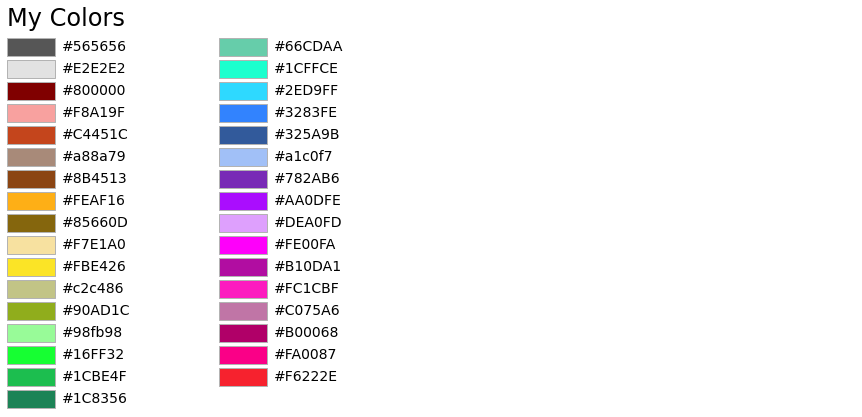

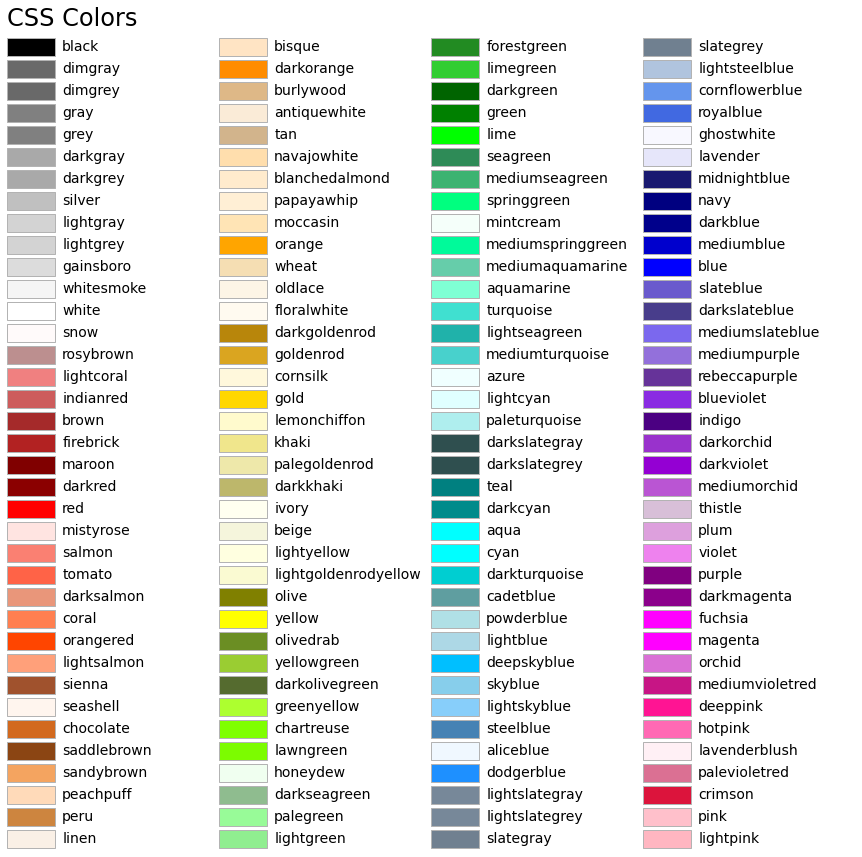

In [71]:
plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(colors_dict, "My Colors",
                sort_colors=True, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

plt.show()

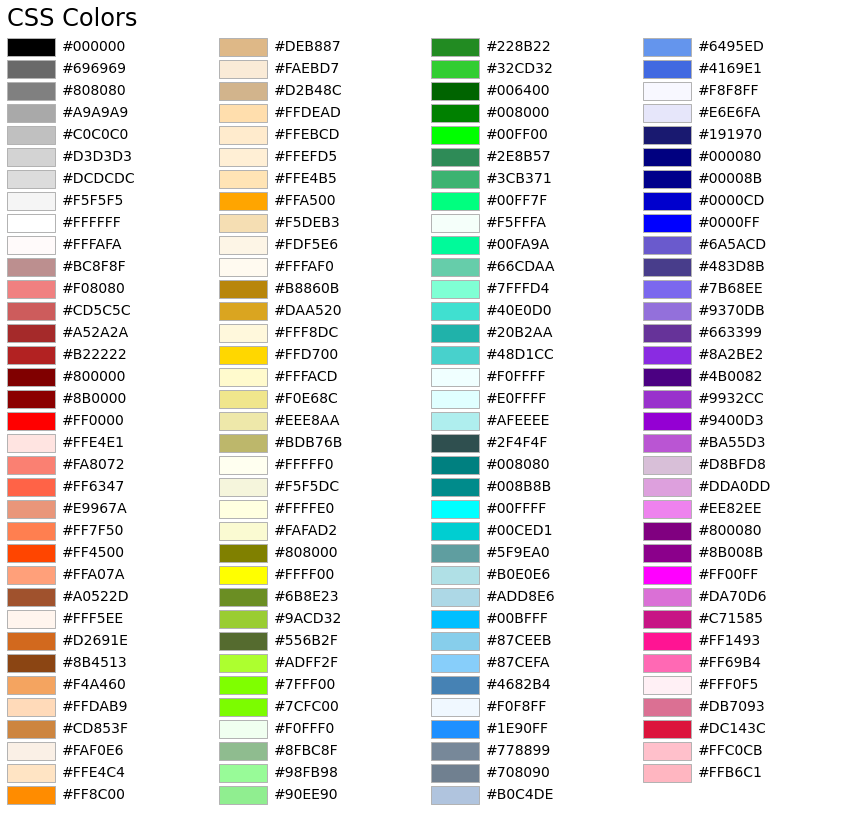

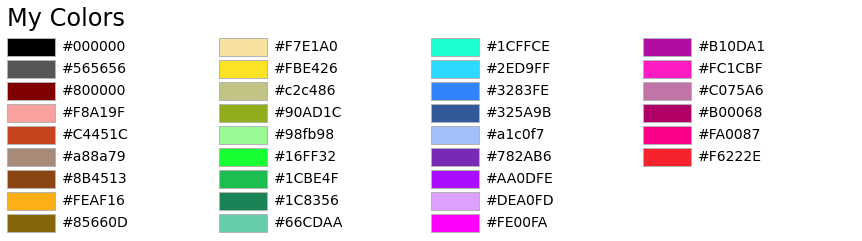

In [76]:
css_fig = plot_colortable(css_col_dict, "CSS Colors", sort_colors=True, emptycols=0)
css_fig.savefig("CSS_Colors.png",facecolor='white')
mycol_fig = plot_colortable(colors_dict, "My Colors", sort_colors=True, emptycols=0)
mycol_fig.savefig("My_Colors.png",facecolor='white')


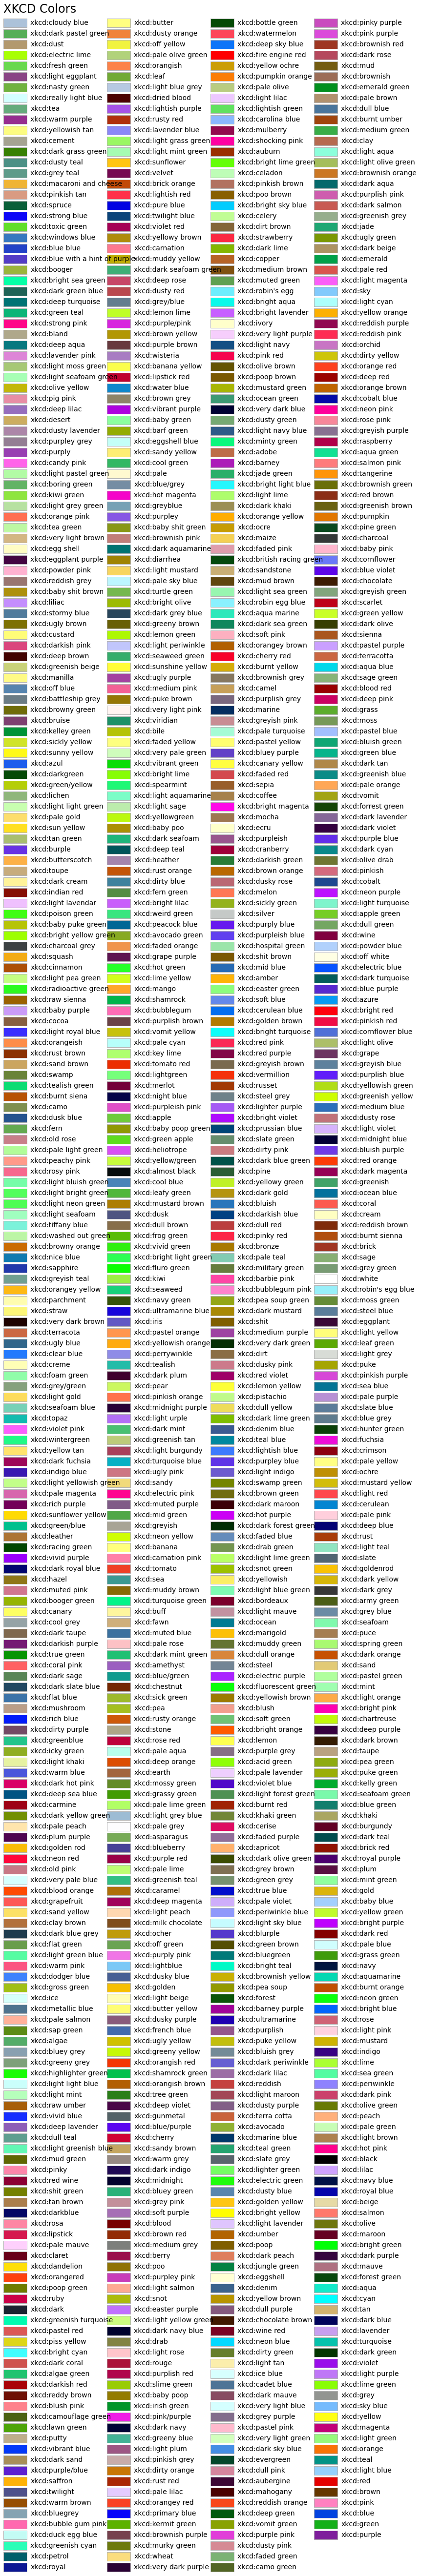

In [63]:
# Optionally plot the XKCD colors
xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors", sort_colors=False, emptycols=0)
xkcd_fig.savefig("XKCD_Colors.png",facecolor='white')